# EDA on Amazon Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib
import string
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

temp_df = pd.read_csv("Amazon_Products.csv",low_memory = False)
temp_df.head()


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we can see there are almost almost 900 unnamed Columns. We can remove them by selecting limited columns

In [2]:
df = temp_df[['uniq_id','product_name','manufacturer','price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating','amazon_category_and_sub_category','description','product_information','product_description','items_customers_buy_after_viewing_this_item','customer_questions_and_answers']]
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN


In [3]:

df.describe()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
count,10002,10002,9995,8567,7502,9984,9237,9984,9312,9351,9943,9350,6936,915
unique,10001,9965,2652,2626,90,195,20,20,256,8514,9939,8513,6749,910
top,},Polyhedral Dice,LEGO,£9.99,2 new,1,1,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,"Welcome to k2, we offer combined items postage...","{""""text"""":""""Fire Tablets""""","Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Is it 12 days or 24? // 24
freq,2,3,171,189,1337,4315,6435,5140,880,113,2,113,38,2


First, we will start with finding all Nan Values

In [4]:
df.isnull().sum()

uniq_id                                           2
product_name                                      2
manufacturer                                      9
price                                          1437
number_available_in_stock                      2502
number_of_reviews                                20
number_of_answered_questions                    767
average_review_rating                            20
amazon_category_and_sub_category                692
description                                     653
product_information                              61
product_description                             654
items_customers_buy_after_viewing_this_item    3068
customer_questions_and_answers                 9089
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   uniq_id                                      10002 non-null  object
 1   product_name                                 10002 non-null  object
 2   manufacturer                                 9995 non-null   object
 3   price                                        8567 non-null   object
 4   number_available_in_stock                    7502 non-null   object
 5   number_of_reviews                            9984 non-null   object
 6   number_of_answered_questions                 9237 non-null   object
 7   average_review_rating                        9984 non-null   object
 8   amazon_category_and_sub_category             9312 non-null   object
 9   description                                  9351 non-null   object
 10  product_in

# Dropping Null Values

We will drop the values where price does not exist, as price is an important factor. Its not possible to fill price with mean values.

In [6]:
df = df.dropna(subset=['price'])
df["price"].shape

(8567,)

Stock, Review, Rating, Number of answered questions can be safely assumed as zeros .

In [7]:
df["number_available_in_stock"].fillna(0,inplace=True)
df["number_of_reviews"].fillna(0,inplace=True)
df["average_review_rating"].fillna("0.0 out of 5 stars",inplace = True)
df["number_of_answered_questions"].fillna(0,inplace=True)

Descriptive String values can be altered in this Manner

In [8]:
df["amazon_category_and_sub_category"].fillna("miscellaneous",inplace=True)
df["description"].fillna("missing",inplace=True)
df["items_customers_buy_after_viewing_this_item"].fillna("No item bought",inplace = True)
df["customer_questions_and_answers"].fillna("No questions asked",inplace = True)
df["product_information"].fillna("No information provided",inplace = True)
df["product_description"].fillna("No description",inplace = True)

Null values of uniq_id, product_name and Manufacturer are removed

In [9]:
df=df.dropna(subset=['uniq_id'])
df=df.dropna(subset=['product_name'])
df=df.dropna(subset=['manufacturer'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   uniq_id                                      8562 non-null   object
 1   product_name                                 8562 non-null   object
 2   manufacturer                                 8562 non-null   object
 3   price                                        8562 non-null   object
 4   number_available_in_stock                    8562 non-null   object
 5   number_of_reviews                            8562 non-null   object
 6   number_of_answered_questions                 8562 non-null   object
 7   average_review_rating                        8562 non-null   object
 8   amazon_category_and_sub_category             8562 non-null   object
 9   description                                  8562 non-null   object
 10  product_inf

# Now, we need to change some values for our convenience

Average review rating can be changed to integer by removing the 'out of 5 stars part'. For ex.- 4.9 out of 5 stars can be turned into 4.9

In [11]:
df['average_review_rating'] = df['average_review_rating'].astype(str)
df['average_review_rating'] = df['average_review_rating'].str.extract(r'(\d+\.\d+)').astype(float)


Price, answered questions ,number of reviews and number available in stock can simply be changed to float

In [12]:
df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['price'] = df['price'].str.split('.').str[0] + '.' + df['price'].str.split('.').str[1]
df['price'] = df['price'].astype(float)

In [13]:

df['number_of_answered_questions'] = pd.to_numeric(df['number_of_answered_questions'], errors='coerce')

In [14]:
df['number_of_reviews'] = df['number_of_reviews'].astype(str)
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
mask = ~df['number_of_reviews'].isnull()
df = df[mask]
df['number_of_reviews'] = df['number_of_reviews'].astype(float)

In [15]:
df['number_available_in_stock'] = df['number_available_in_stock'].astype(str)
df['number_available_in_stock'] = df['number_available_in_stock'].str.replace('new', '')
df['number_available_in_stock'] = df['number_available_in_stock'].str.replace(r'[^\d.]+', '', regex=True)
df['number_available_in_stock'].replace('',float('NaN'), inplace=True)
df['number_available_in_stock'].fillna(0.0,inplace=True)
df['number_available_in_stock'] = df['number_available_in_stock'].astype(float)

This is how the final DataFrame looks like, and we are going to perform EDA on this DataFrame

In [16]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5.0,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0.0,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2.0,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0.0,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,No item bought,No questions asked
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0.0,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,No questions asked


C:\Users\pandh\AppData\Local\Temp\ipykernel_17724\782106457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'viridis')


<Axes: >

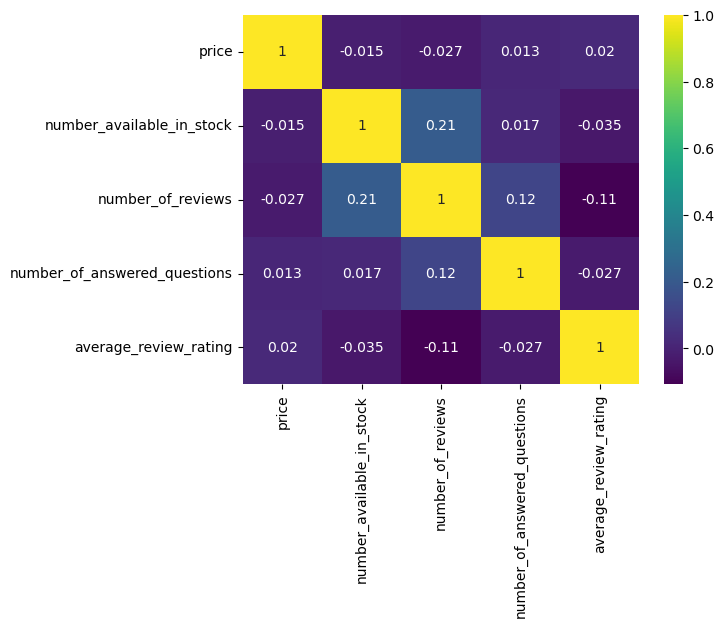

In [17]:
sns.heatmap(df.corr(),annot = True, cmap = 'viridis')

## Pie chart on Top 10 Ratings -

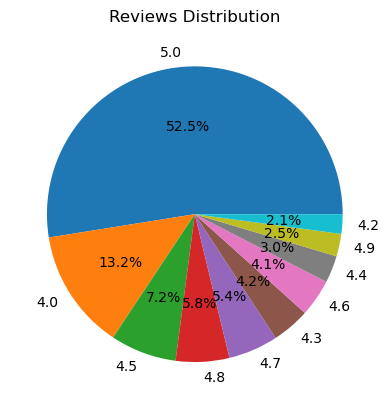

In [18]:
amazon_name = df.average_review_rating.value_counts().index
amazon_val = df.average_review_rating.value_counts().values
plt.pie(amazon_val[:10],labels = amazon_name[:10],autopct = '%1.1f%%')
plt.title("Reviews Distribution")
matplotlib.rcParams['figure.figsize']=(12,6)
plt.show()

Observation:
1. Its evident that most of the reviews were 5 stars

## Histogram on Number of Rating vs Average rating

Text(0.5, 1.0, 'No of ratings vs average Rating')

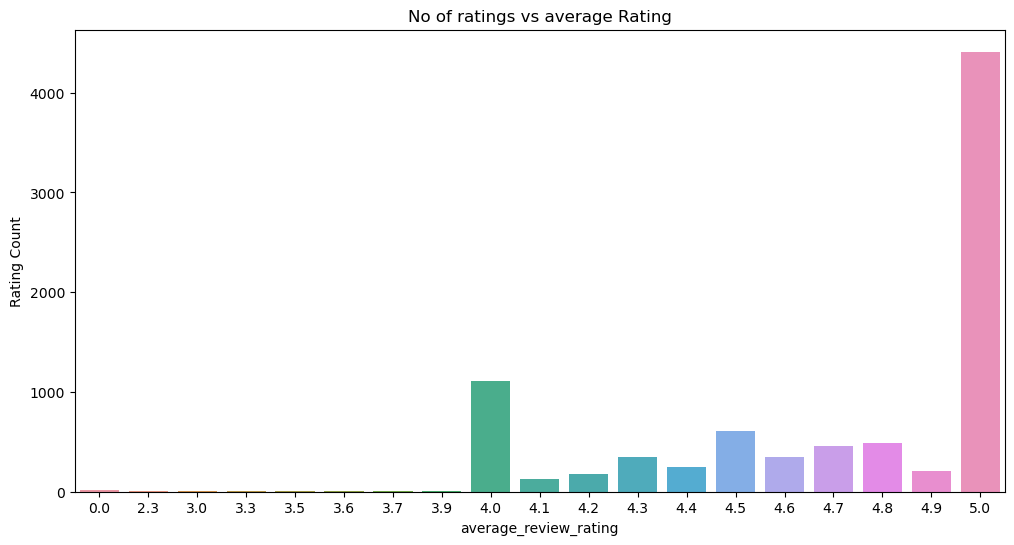

In [19]:
top_reviews = df.groupby(['average_review_rating']).size().reset_index().rename(columns = {0:'Rating Count'})
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'average_review_rating', y = 'Rating Count',data = top_reviews,errwidth = 0)
plt.title('No of ratings vs average Rating')

Observations :
1. 5.0 star count is very high.
2. 4.0 star count is second highest
3. Most of reviews lie between 4 star and 5 star

## Scattering various parameters based on Reviews:

Text(0.5, 1.0, 'Relationship between average review rating and number of reviews')

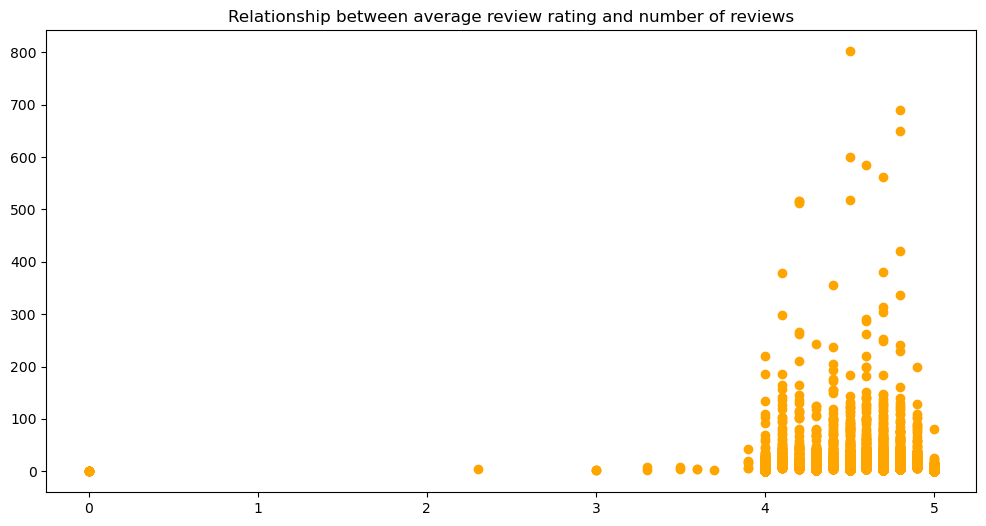

In [20]:
plt.scatter( df["average_review_rating"],df["number_of_reviews"],c = 'orange')
plt.title('Relationship between average review rating and number of reviews')

Text(0.5, 1.0, 'Relationship between review and number of answered questions')

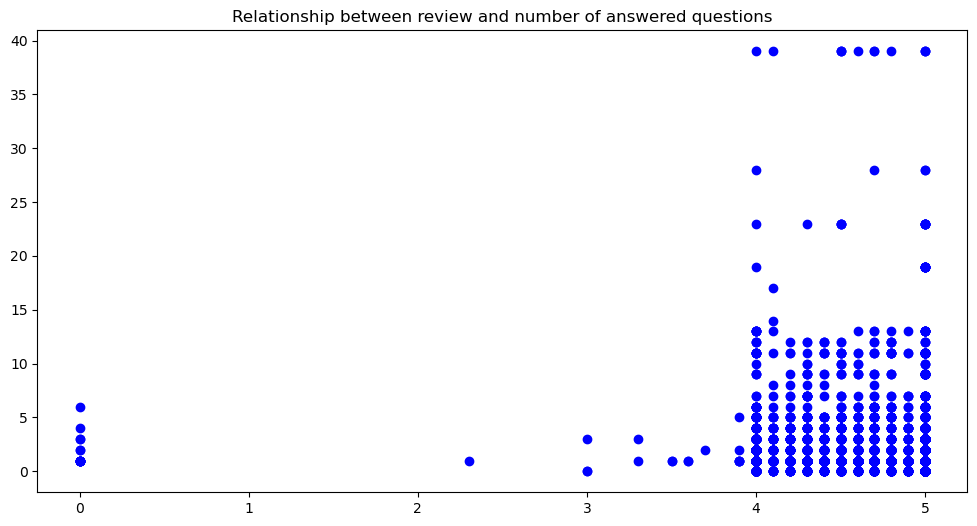

In [21]:
plt.scatter(df["average_review_rating"],df["number_of_answered_questions"],color = 'blue')
plt.title('Relationship between review and number of answered questions')

Text(0.5, 1.0, 'Relationship between review and number of available stock')

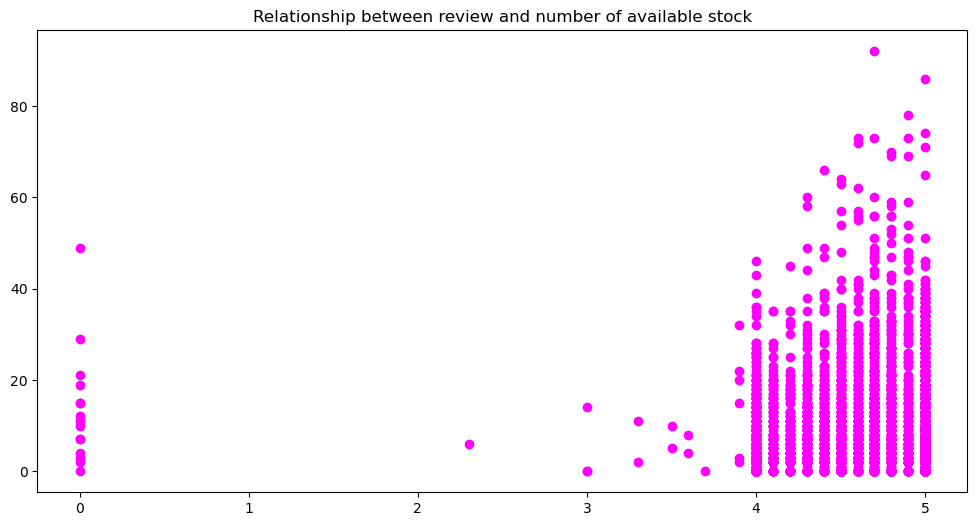

In [22]:
plt.scatter(df["average_review_rating"],df["number_available_in_stock"],color = 'magenta')
plt.title('Relationship between review and number of available stock')

Observation:
   1. There appears to be lot of 4-5 star ratings and as a result no clear relationship can be established between parameters

## Sales of Amazon as per Category

Text(0.5, 1.0, 'Maximum Selling Categories in Amazon')

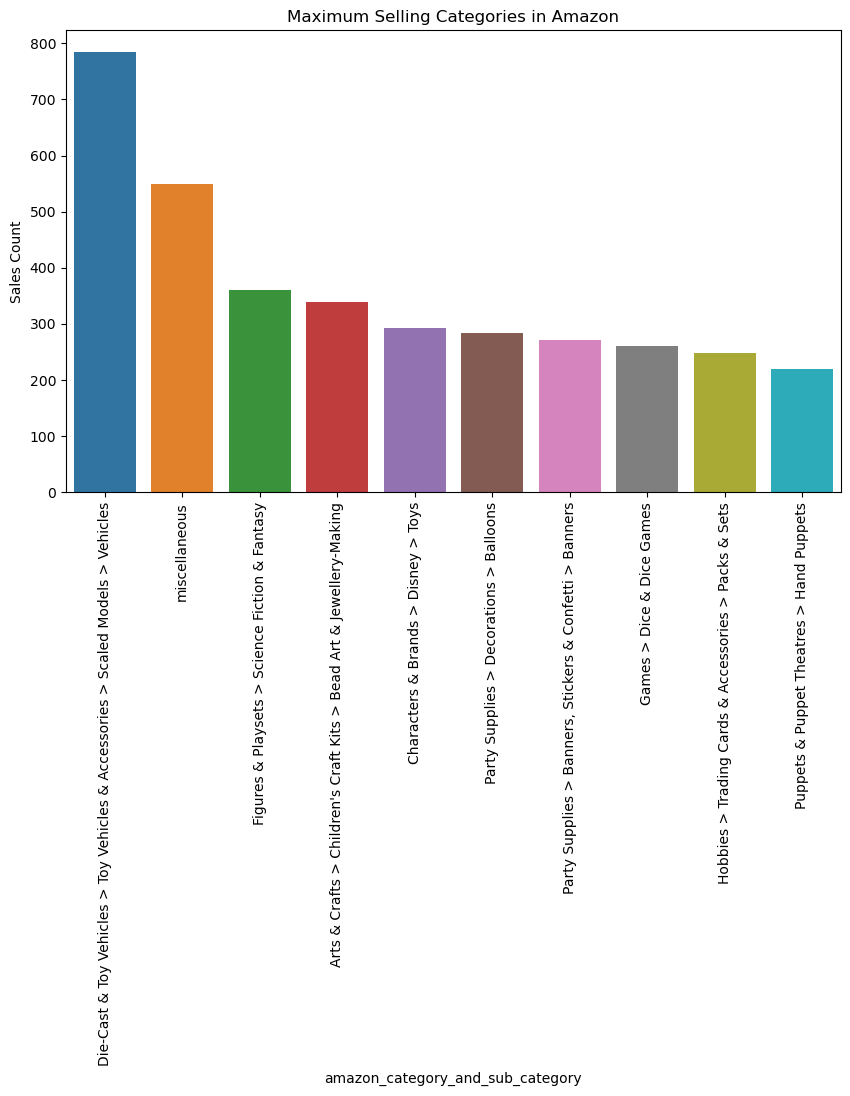

In [23]:
top_sales = df.groupby(['amazon_category_and_sub_category']).size().reset_index().rename(columns={0:'Sales Count'})
top_sales.sort_values(by = 'Sales Count',ascending = False)
matplotlib.rcParams['figure.figsize']=(10,6)
sns.barplot(x = 'amazon_category_and_sub_category',y='Sales Count',data = top_sales.nlargest(10,'Sales Count'),errwidth = 0)
plt.xticks(rotation = 90)
plt.title('Maximum Selling Categories in Amazon')

Observations:
1. Die-Cast & Toy Vehicles category account for highest sales on Amazon
2. Miscellaneous Category accounts for second highest sales
3. Articles for children (Toys, Craft kits, Party ballons, etc. ) account for highest sales on Amazon

## No of Products of Each Manufacturer

Text(0.5, 1.0, 'Top Manufacturers/Suppliers in Amazon')

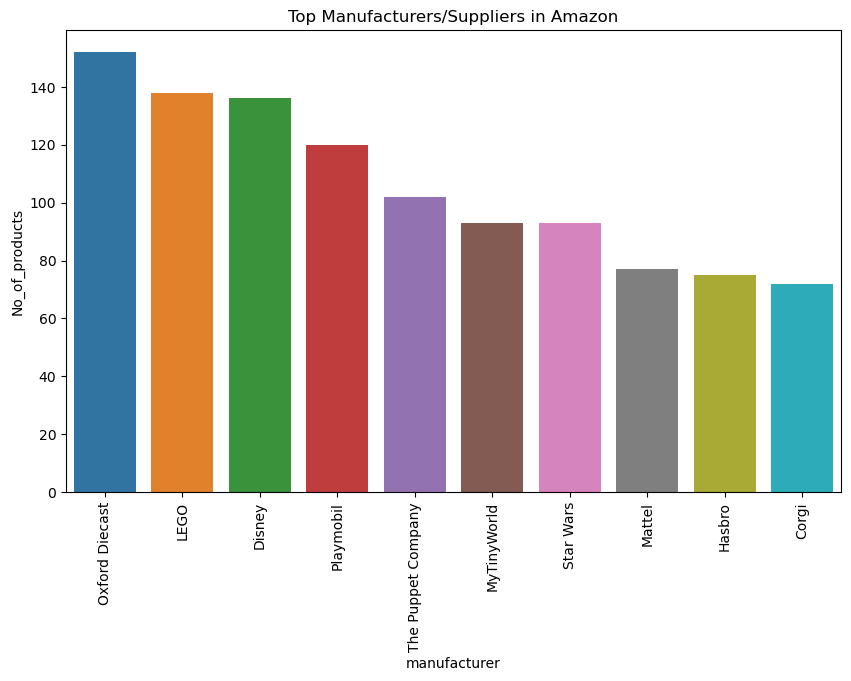

In [24]:
top_manufacturers = df.groupby(['manufacturer']).size().reset_index().rename(columns={0:'No_of_products'})
top_manufacturers.sort_values(by = 'No_of_products',ascending = False)
matplotlib.rcParams['figure.figsize']=(10,6)
sns.barplot(x = 'manufacturer',y='No_of_products',data = top_manufacturers.nlargest(10,'No_of_products'),errwidth = 0)
plt.xticks(rotation = 90)
plt.title('Top Manufacturers/Suppliers in Amazon')

Observations:
1. Oxford Diecast supplies most amount of Products to Amazon.
2. Generally, Children's article maker (ex. Lego, Disney, Star Wars, etc) are largest suppliers/manufacturers in Amazon.

## Stocks Availability of Products

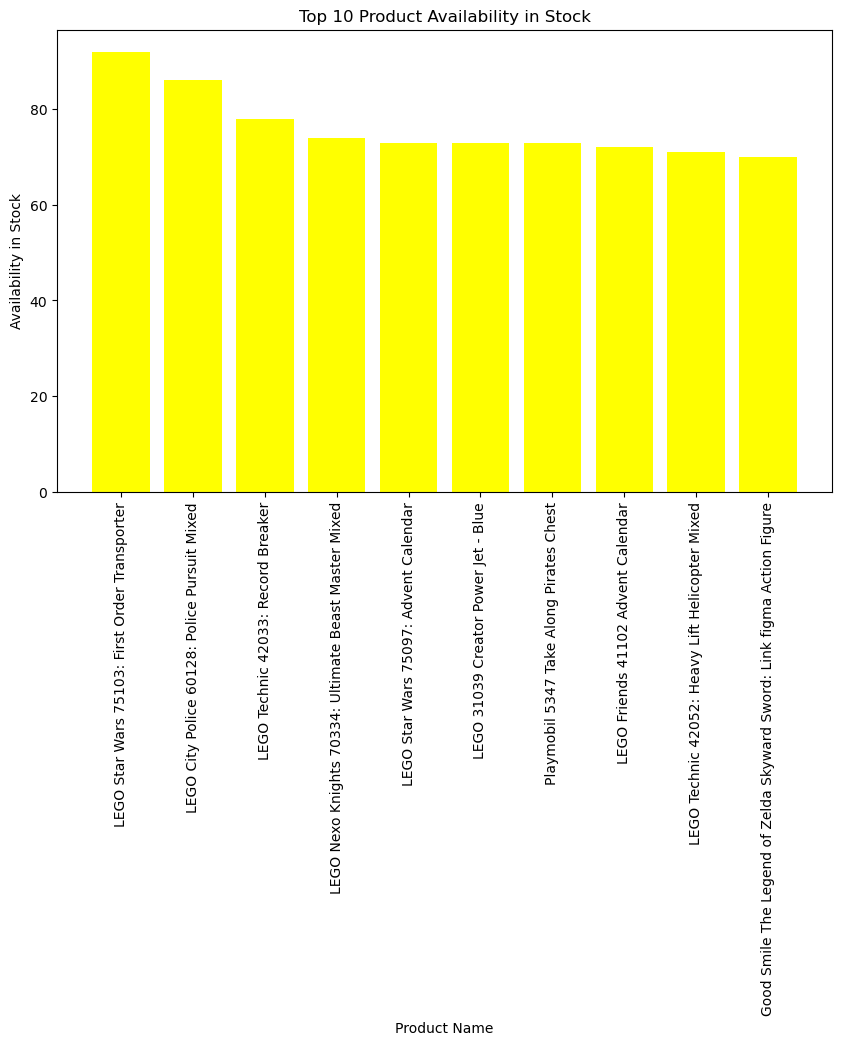

In [25]:
df_sorted_by_no_in_stock = df.sort_values(by='number_available_in_stock', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted_by_no_in_stock['product_name'].head(10), df_sorted_by_no_in_stock['number_available_in_stock'].head(10), color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Availability in Stock')
plt.title('Top 10 Product Availability in Stock')
plt.show()

Observations:
1. LEGO Star Wars had highest Stocks
2. LEGO dominated the top 10 list of highest availability with 8 out of 10 products in the list


## Classification Based on Prices

### Most Expensive Products in Amazon

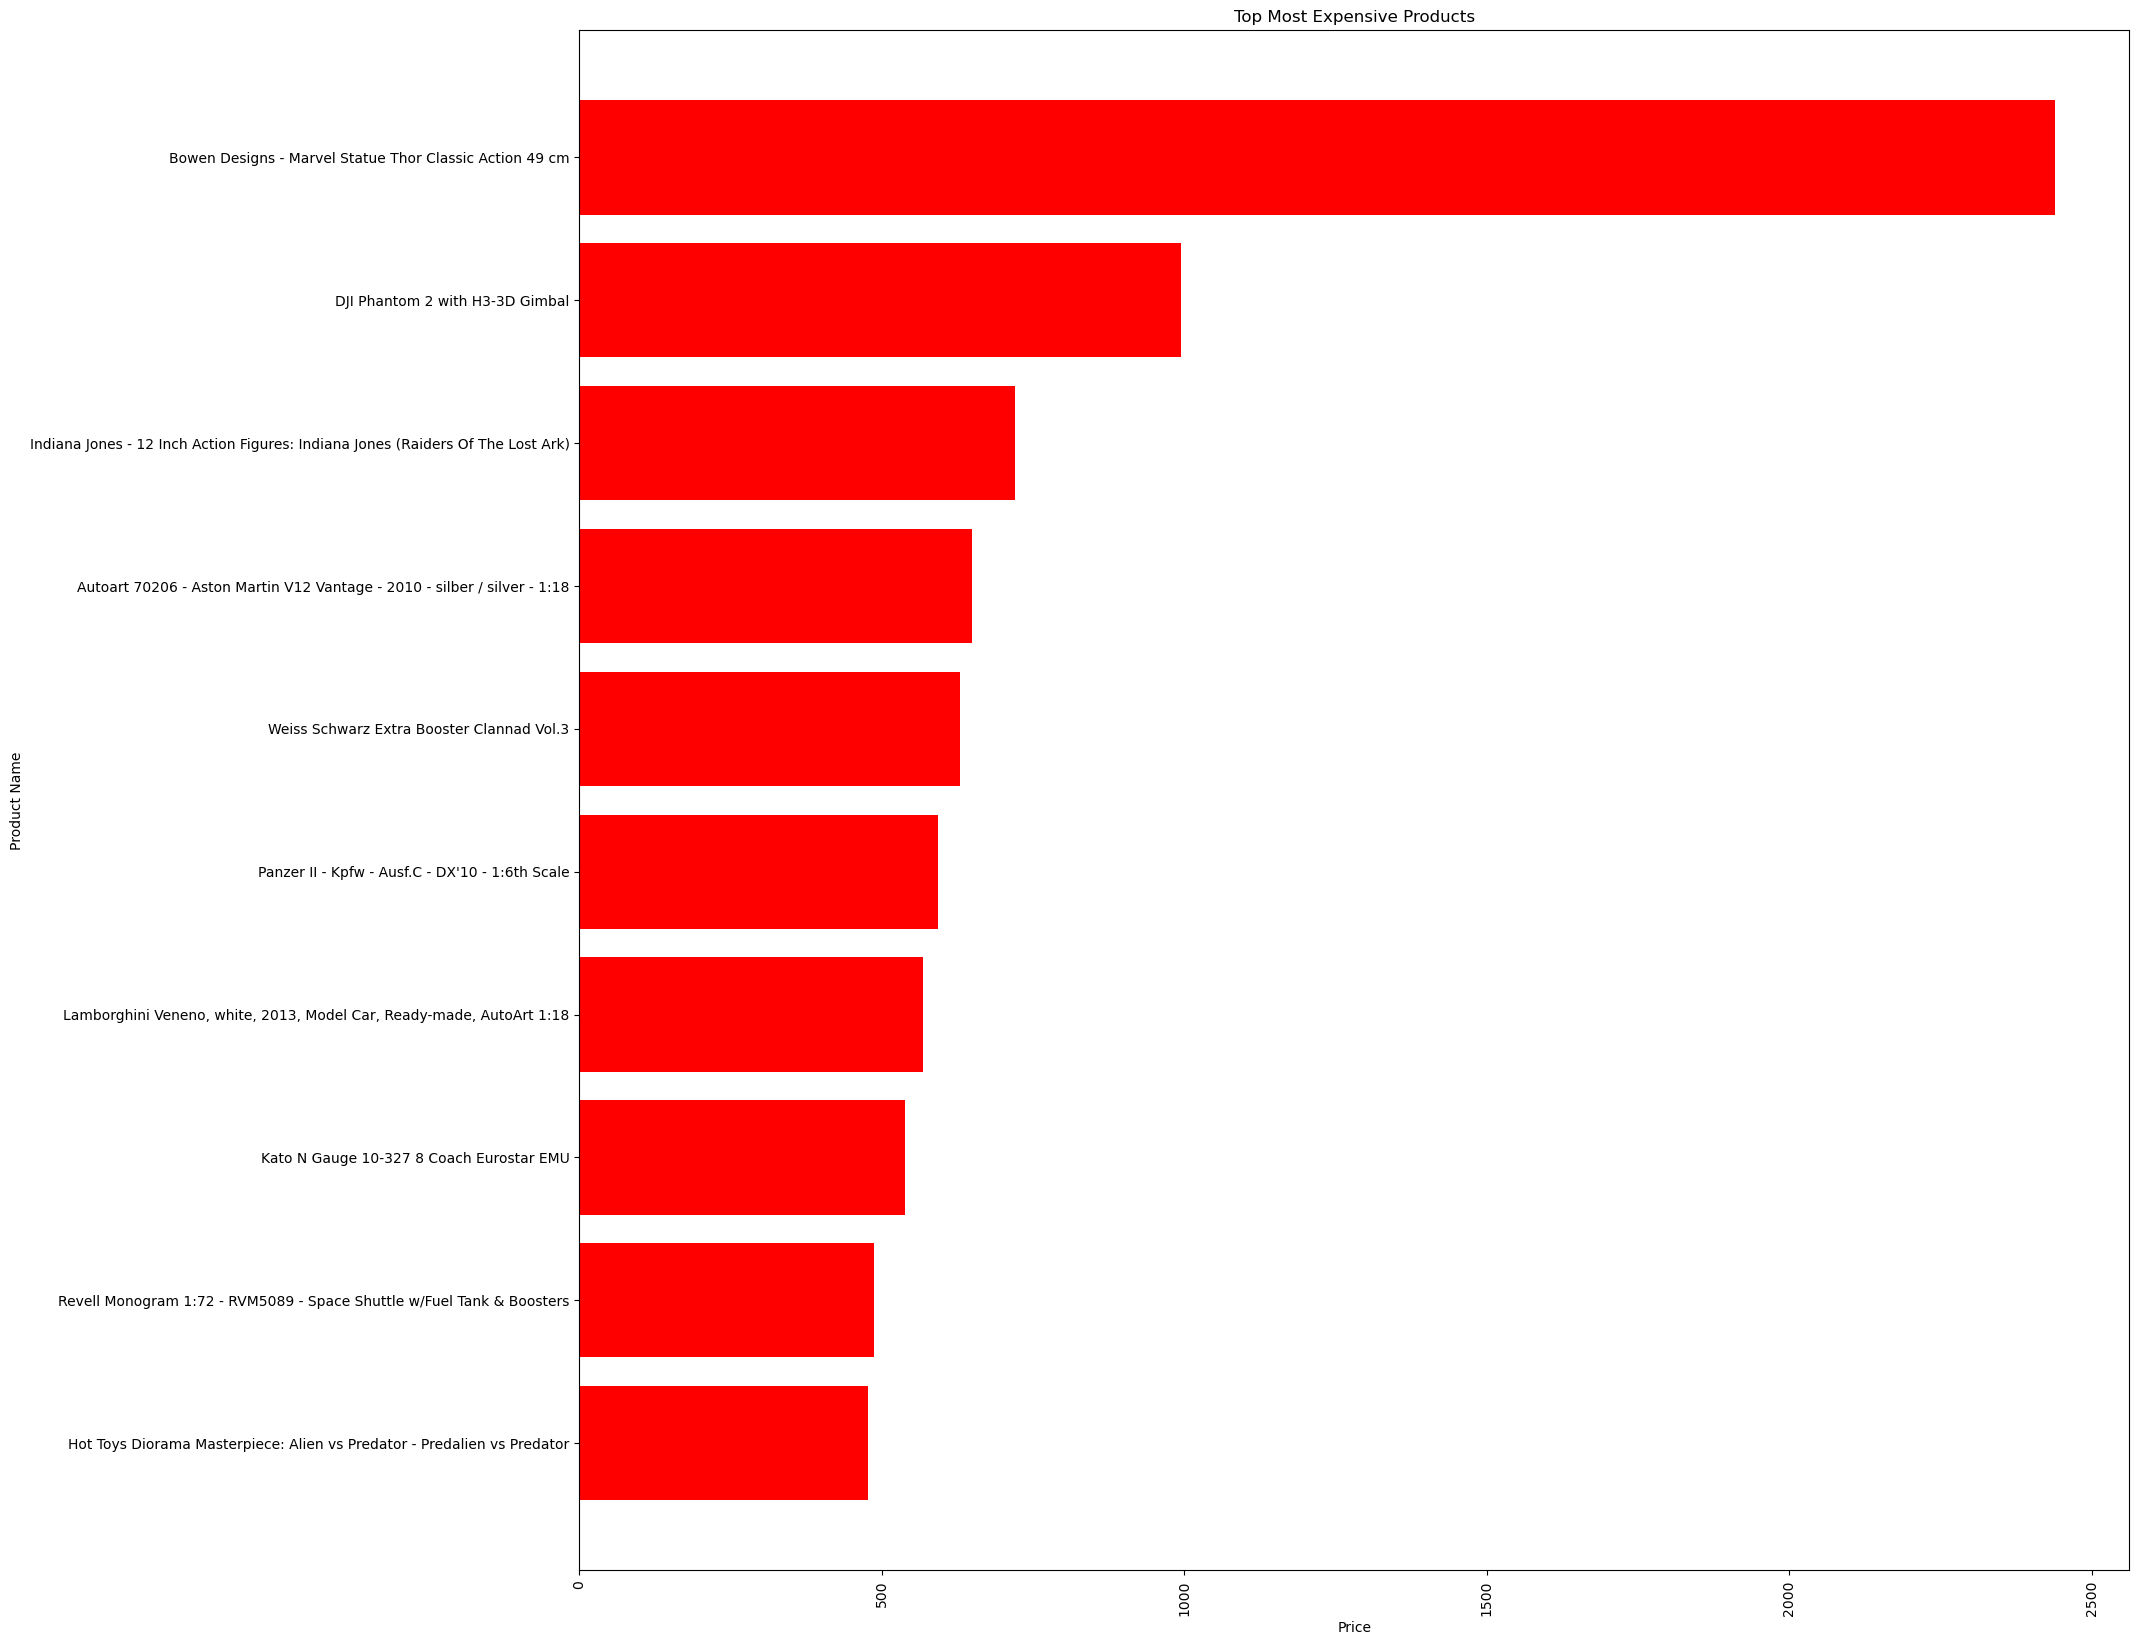

In [26]:
top_most_expensive = df.sort_values(by='price', ascending=True).tail(10)

plt.figure(figsize=(20, 20))
plt.barh(top_most_expensive['product_name'],top_most_expensive['price'], color='red')
plt.xlabel('Price')
plt.xticks(rotation=90)
plt.ylabel('Product Name')
plt.title('Top Most Expensive Products')
plt.show()

### Least Expensive Products in Amazon

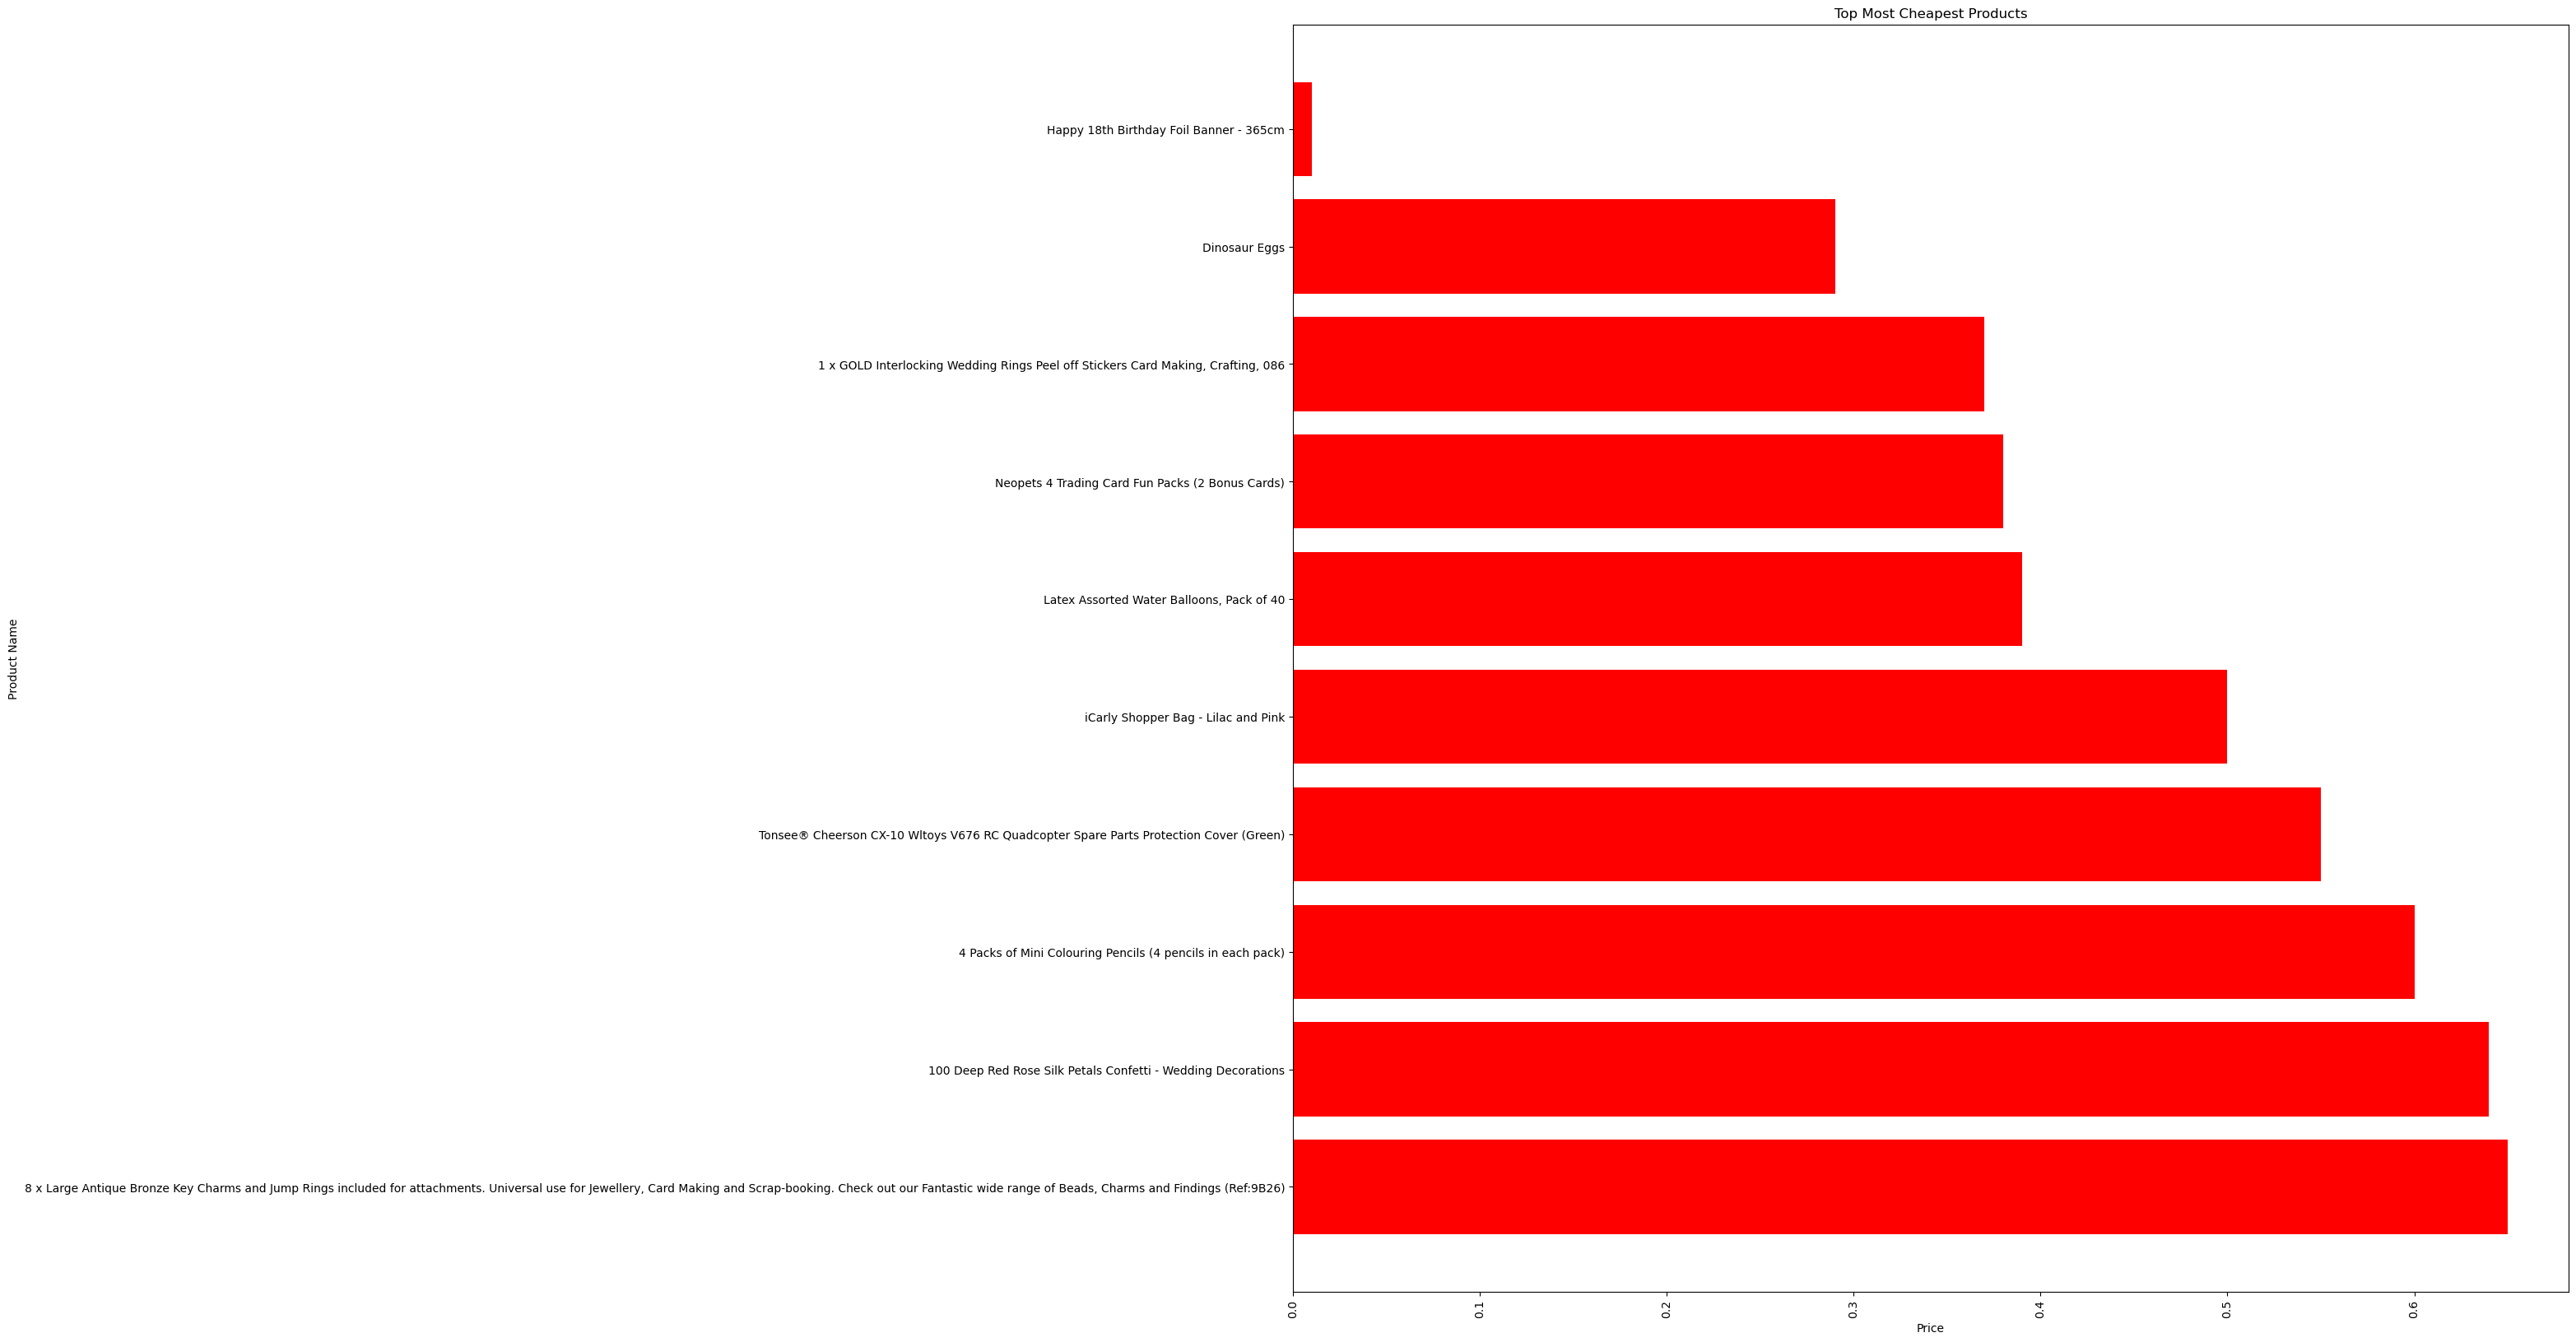

In [27]:
least_most_expensive = df.sort_values(by='price', ascending=False).tail(10)

plt.figure(figsize=(20, 20))
plt.barh(least_most_expensive['product_name'],least_most_expensive['price'], color='red')
plt.xlabel('Price')
plt.xticks(rotation=90)
plt.ylabel('Product Name')
plt.title('Top Most Cheapest Products')
plt.show()

Observations:
   1. Products in Amazon range from as low as less than 0.1 pounds to as high as 2500 pounds

### No. of People buying Top related Products

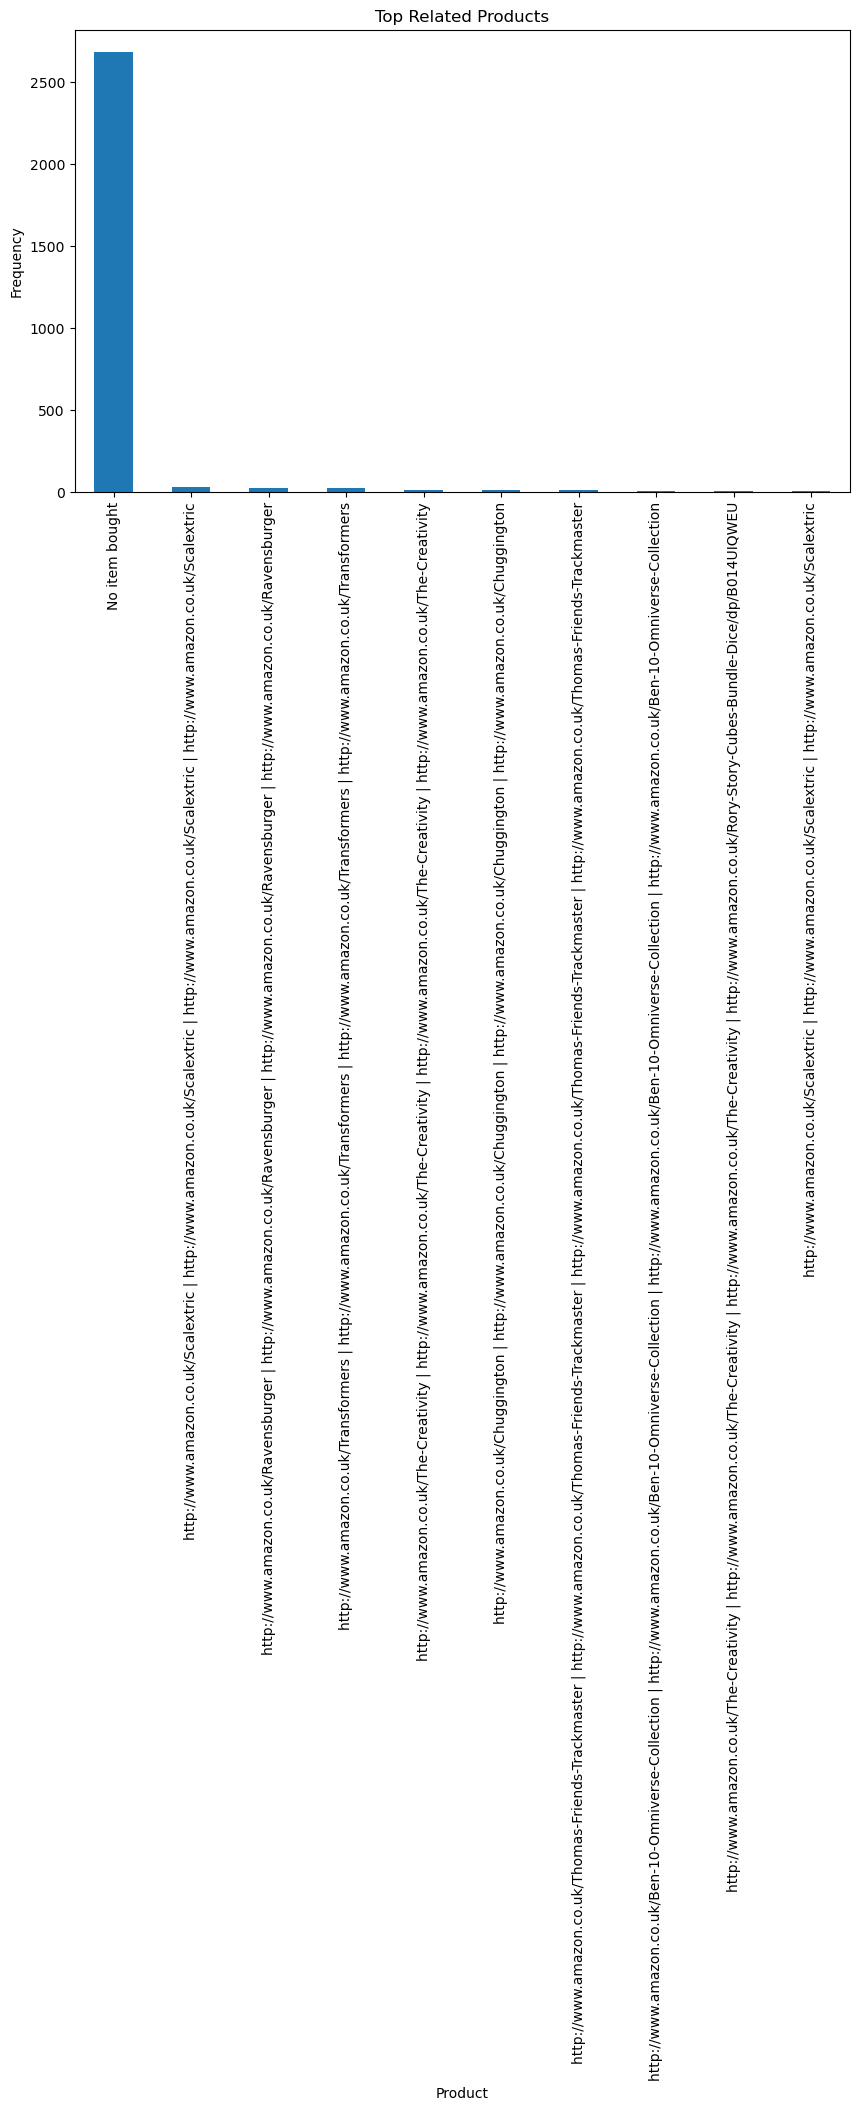

In [28]:
df['related_products'] = df['items_customers_buy_after_viewing_this_item'].str.split(';')

related_products_count = df['related_products'].explode().value_counts()

top_n = 10
top_related_products = related_products_count.head(top_n)

plt.figure(figsize=(10, 6))
top_related_products.plot(kind='bar')
plt.title('Top Related Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Observations:
   1. Generally, no product is bought right after buying one product

### High Frequency words in Product Description

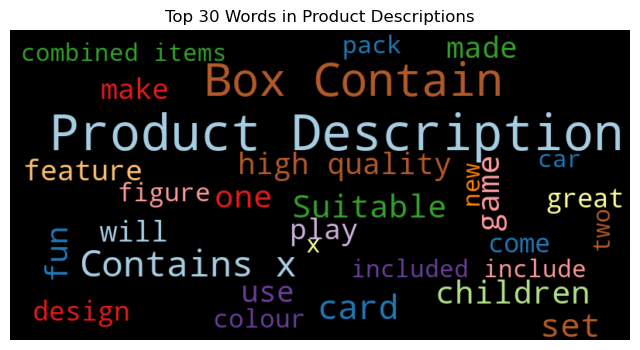

In [29]:
from wordcloud import WordCloud
text = " ".join(description for description in df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Paired_r', max_words=30).generate(text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 30 Words in Product Descriptions')
plt.show()